In [316]:
import pandas as pd
import numpy as np

In [317]:
df = pd.read_csv("/Users/samirbhojwani/Documents/7. Python/Python Self-Learning/Marketing Analysis/marketing.csv",
                parse_dates =['date_served', 'date_subscribed', 'date_canceled'])

## Part 1: Exploring the Data

In [318]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


## Data Cleaning

In [319]:
df.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


In [320]:
df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [322]:
# df['is_retained'] = df['is_retained'].astype("bool")

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [324]:
df["marketing_channel"].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [325]:
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

df["channel_code"]=df["subscribing_channel"].map(channel_dict)

In [326]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0


In [327]:
df["language_displayed"].value_counts()

English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64

In [328]:
df["language_preferred"].value_counts()

English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64

In [329]:
df["is_correct_lang"]= np.where(
    df["language_displayed"]==df["language_preferred"],"Yes","No")

In [330]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes


In [331]:
df['DoW'] = df["date_subscribed"].dt.dayofweek

In [332]:
df["DoW"].value_counts()

1.0    386
2.0    352
0.0    306
3.0    226
4.0    199
6.0    196
5.0    191
Name: DoW, dtype: int64

In [333]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0


## Preliminary Analysis

In [334]:
#Aggretate unique users that see ads by date

daily_users = df.groupby(["date_served"])['user_id'].nunique(dropna=True)
#nunique method counts the number of unique users by day

In [335]:
daily_users
#Looks like there are about 300 users on average

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

In [336]:
import matplotlib.pyplot as plt

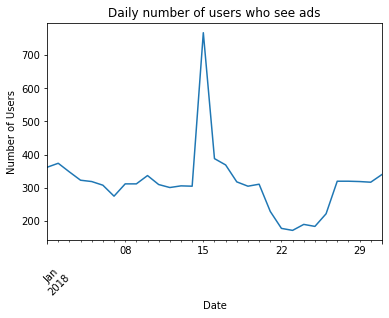

In [337]:
#Plot
daily_users.plot()
plt.title("Daily number of users who see ads")
plt.xlabel("Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

## Part 2: Common Marketing Metrics

In [338]:
# One Commmon question asked is: Was this campaign successful?
# This is a tough question to answer, but for a marketing team the
# success is typically determined by Conversion Rate.
# In addition, Retention is also a metric of success. Does the customer
# keep using the product 2-3-6 months after conversion?

In [339]:
#Calculating conversion rates
subscribers= df[df["converted"]==True]["user_id"].nunique()

In [340]:
total = df["user_id"].nunique()

In [341]:
conv_rate = subscribers/total

In [342]:
print(round(conv_rate*100,2),"%")

13.89 %


In [343]:
#Calculating Retention Rate= (No of ppl who remain subscribed)/(Total
#number of converted)

In [344]:
retained = df[df["is_retained"]==True]["user_id"].nunique()

In [345]:
subscribers= df[df["converted"]==True]["user_id"].nunique()

In [346]:
retention = retained/subscribers

In [347]:
print(round(retention*100, 2),"%")

66.8 %


### Customer Segmentation

In [348]:
#Breaking down metrics by certain characteristics.

In [349]:
#Segment by Subscribing Channel

#Subset the data
house_ads = df[df["subscribing_channel"]=="House Ads"]

In [350]:
#Calculate the retention rate of only House Ads customers
retained = house_ads[house_ads["is_retained"]==True]["user_id"].nunique()
subscribers = house_ads[house_ads["converted"]==True]["user_id"].nunique()

In [351]:
retention_rate= retained/subscribers
print(round(retention_rate*100,2),"%")

58.05 %


In [352]:
#Use Groupby to do the same thing for ALL subscribing_channels
retained = df[df["is_retained"]==True].groupby(["subscribing_channel"])["user_id"].nunique()

In [353]:
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [354]:
#Group the subscribers also
subscribers = df[df["converted"]==True].groupby(["subscribing_channel"])["user_id"].nunique()

In [355]:
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [356]:
channel_retention_rate= retained/subscribers

In [357]:
print(round(channel_retention_rate*100,1),"%")

subscribing_channel
Email        87.6
Facebook     68.8
House Ads    58.1
Instagram    68.1
Push         70.1
Name: user_id, dtype: float64 %


In [358]:
#Example 2

In [359]:
# Group by language_displayed and count unique users
total = df.groupby(["language_displayed"])["user_id"].nunique()

# Group by language_displayed and count unique conversions
subscribers = df[df["converted"]==True].groupby(["language_displayed"])["user_id"].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [360]:
#Example 3: Seeing conversion rates by day

# Group by date_served and count unique users
total = df.groupby(["date_served"])["user_id"].nunique()

# Group by date_served and count unique converted users
subscribers = df[df["converted"]==True].groupby(["date_served"])["user_id"].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


### Plotting Campaign Results

In [361]:
import matplotlib.pyplot as plt

In [362]:
#Create a bar chart using Channel retetion Dataframe

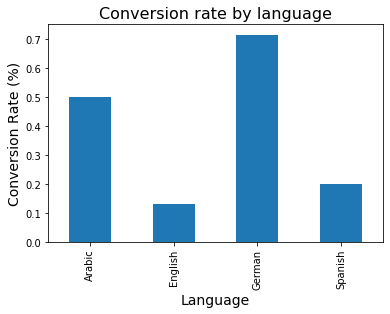

In [363]:
language_conversion_rate.plot(kind="bar")
#Add a title and axis labels
plt.title("Conversion rate by language",size=16)
plt.xlabel("Language",size=14)
plt.ylabel("Conversion Rate (%)",size = 14)
#Display the plot
plt.show()

In [364]:
#Grouping by multiple columns

In [365]:
language = df.groupby(["date_served","language_preferred"])["user_id"].count()

In [366]:
print(language)

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               317
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64


In [367]:
#Unstack to transform the data
language2= pd.DataFrame(language.unstack(level=1))
#level = 1 means you want to unstack the SECOND index

In [368]:
language2.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


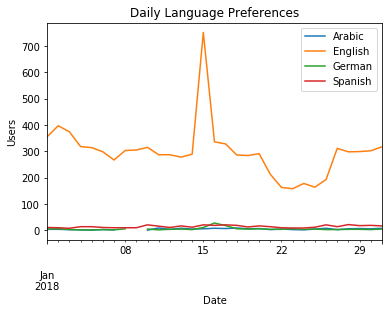

In [369]:
language2.plot()
plt.title("Daily Language Preferences")
plt.xlabel("Date")
plt.ylabel("Users")
plt.legend(loc="upper right",
          labels=language2.columns.values)
plt.show()

In [370]:
#Create dataframe to groupby age and language preference
language_age = df.groupby(["age_group",
                                 "language_preferred"])["user_id"].count()

language_age = pd.DataFrame(language_age.unstack(level=1))
print(language_age.head())

language_preferred  Arabic  English  German  Spanish
age_group                                           
0-18 years              19     1421      31       68
19-24 years             26     1560      29       67
24-30 years             19     1442      35       72
30-36 years             19     1251      16       69
36-45 years             19     1260      19       55


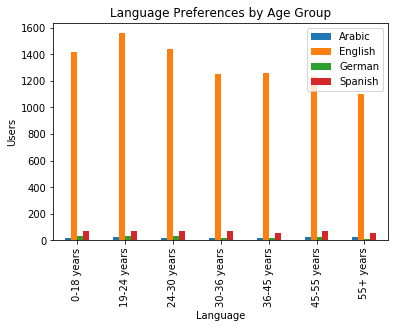

In [371]:
language_age.plot(kind="bar")
plt.title("Language Preferences by Age Group")
plt.xlabel("Language")
plt.ylabel("Users")
plt.legend(loc="upper right",
          labels=language_age.columns.values)
plt.show()

## Part 3: Building Functions to Automate Analysis

In [372]:
#We saw that we were doing a lot of repetition in our tasks.
#Any time you notice repetition in Python, you need to think about how
#you can automate it.

In [373]:
def retention_rate(dataframe,column_names):
    #Group by column names and calculate retention:
    retained = dataframe[dataframe["is_retained"]==True].groupby(column_names)\
    ["user_id"].nunique()

    #Group by column names and calculate conversion
    converted = dataframe[dataframe["converted"]==True].groupby(column_names)\
    ["user_id"].nunique()
    
    retention_rate = retained/converted
    
    return retention_rate

In [374]:
#Now all we have to do is call the function:

retention_rate(df,["date_subscribed","subscribing_channel"])

date_subscribed  subscribing_channel
2018-01-01       Email                  1.000000
                 Facebook               0.875000
                 House Ads              0.687500
                 Instagram              0.750000
                 Push                   1.000000
                                          ...   
2018-01-31       Email                  1.000000
                 Facebook               0.833333
                 House Ads              0.500000
                 Instagram              0.666667
                 Push                   0.500000
Name: user_id, Length: 155, dtype: float64

In [375]:
daily_ret = retention_rate(df,["date_subscribed","subscribing_channel"])
daily_ret = pd.DataFrame(daily_ret.unstack(level=1))

print(daily_ret.head())

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            1.00  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


In [376]:
# Function to create Graphs:

def plotting(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index,dataframe[column])
        plt.title("Daily "+column + " retention rate\n",size =16)
        plt.ylabel("Retention rate (%)", size = 14)
        plt.xlabel("Date",size=14)
        plt.show()

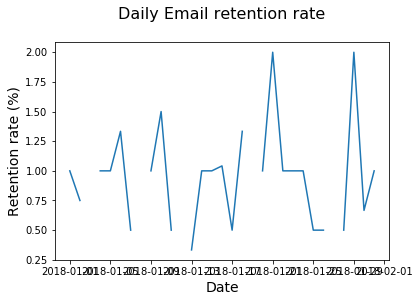

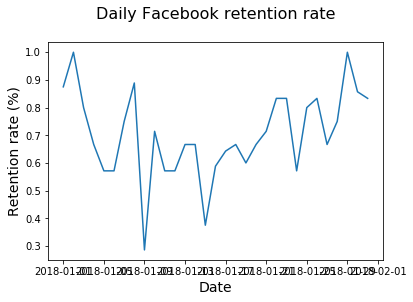

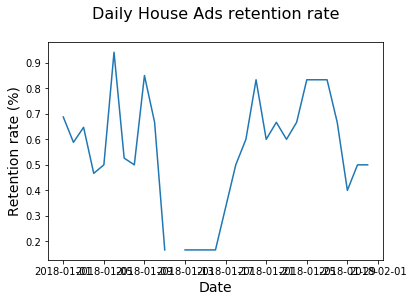

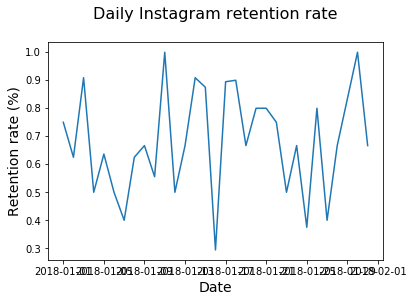

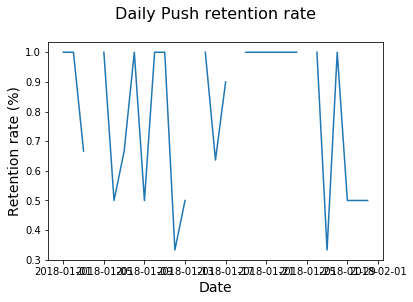

In [377]:
plotting(daily_ret) #Now you get a cleaner read of all types of media

In [378]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe["converted"]==True].groupby(column_names)["user_id"].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)["user_id"].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


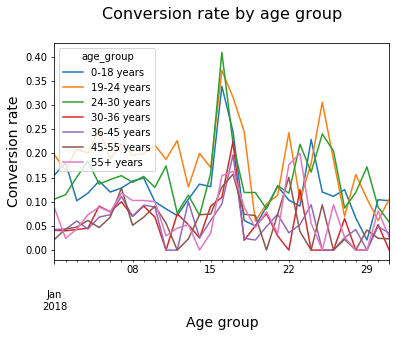

In [379]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(df, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot(kind="line")
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

### Identifying Inconsistencies

In [380]:
# Day of the week trends:

DoW_retention = retention_rate(df,["DoW"])

In [381]:
DoW_retention

DoW
0.0    0.763006
1.0    0.717593
2.0    0.680203
3.0    0.612613
4.0    0.603960
5.0    0.679612
6.0    0.634615
Name: user_id, dtype: float64

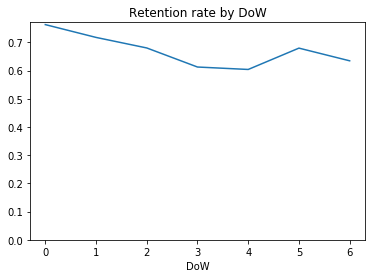

In [382]:
DoW_retention.plot()
plt.title("Retention rate by DoW")
plt.ylim(0) #IMPORTANT: Starts the y-axis at 0
plt.show()

In [383]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(df,["date_served","marketing_channel"])

print(round(daily_conv_channel,2).head())

date_served  marketing_channel
2018-01-01   Email                1.00
             Facebook             0.12
             House Ads            0.08
             Instagram            0.11
             Push                 0.08
Name: user_id, dtype: float64


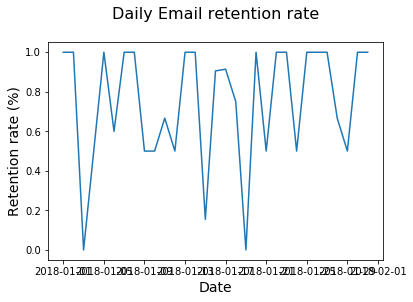

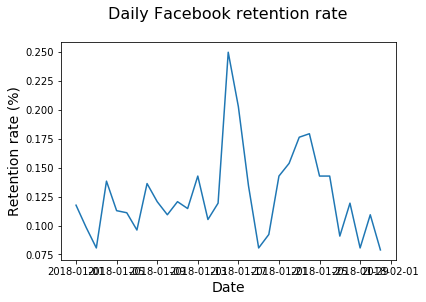

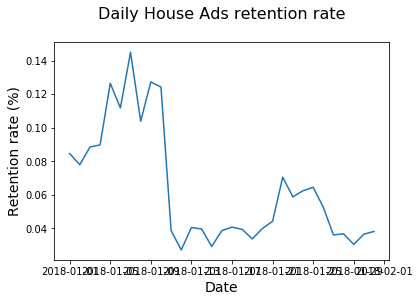

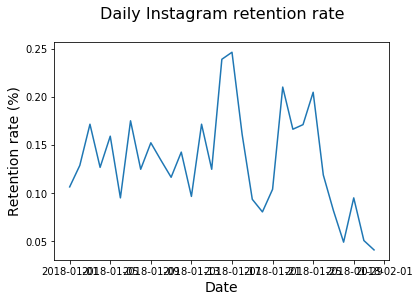

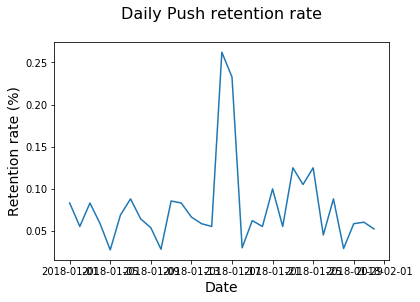

In [384]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(df, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting(daily_conv_channel)

### Resolving Inconsistencies

In [385]:
#Calculate pre-error conversion rates
#Bug arose some time around 2018-01-11
house_ads_no_bug = house_ads[house_ads["date_served"]<"2018-01-11"]
lang_conv= conversion_rate(house_ads_no_bug,["language_displayed"])

In [386]:
lang_conv

language_displayed
Arabic     1.000000
English    0.865854
German     0.857143
Spanish    0.894737
Name: user_id, dtype: float64

In [387]:
#Create an index to compare conversion rates against English conv rates
spanish_index = lang_conv["Spanish"]/lang_conv["English"]
arabic_index = lang_conv["Arabic"]/lang_conv["English"]
german_index = lang_conv["German"]/lang_conv["English"]

In [388]:
#This helps us to understand how well our marketing assets help us to
#convert for each language COMPARED TO ENGLISH

spanish_index

1.033358042994811

In [389]:
arabic_index

1.1549295774647887

In [390]:
german_index #German speakers convert at a rate of 0.98 compared to English speakers

0.9899396378269617

In [391]:
#Calculate the total number of users and actual conversions on each day

In [392]:
language_conversion = house_ads.groupby(
    ["date_served","language_preferred"]).agg(
    {"user_id":"nunique",
     "converted":"sum"}) #Agg will help us calculate multiple statistics

In [393]:
language_conversion

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                  29        13
            German                    2         1
2018-01-02  English                  14        14
            German                    3         3
...                                 ...       ...
2018-01-30  English                   4         4
            Spanish                   2         2
2018-01-31  Arabic                    1      True
            English                   4         4
            Spanish                   1      True

[66 rows x 2 columns]

In [394]:
expected_conversion = pd.DataFrame(language_conversion.unstack(level=1))

In [395]:
expected_conversion
#The output is a graph of number of users who should have seen ads in
#each language and number of users who should have converted each day

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0    29.0    2.0     NaN         2      13      1   
2018-01-02             NaN    14.0    3.0     NaN       NaN      14      3   
2018-01-03             NaN    15.0    1.0     1.0       NaN      15   True   
2018-01-04             NaN    22.0    NaN     6.0       NaN      12    NaN   
2018-01-05             NaN    17.0    NaN     3.0       NaN      17    NaN   
2018-01-06             3.0    12.0    NaN     2.0         3      12    NaN   
2018-01-07             2.0    14.0    2.0     1.0         2      14      2   
2018-01-08             NaN    11.0    3.0     2.0       NaN      11      3   
2018-01-09             NaN    19.0    NaN     1.0       NaN      19    NaN   
2018-01-10             NaN    37.0    4.0     6.0       NaN      15      2   
2018-01-11             NaN     6.0    NaN     NaN       NaN       6    NaN   
2018-01-12             NaN     3.0    NaN     1.0       NaN       3    NaN   
2018-01-13             NaN     5.0    1.0     NaN       NaN       5   True   
2018-01-14             NaN     6.0    NaN     NaN       NaN       6    NaN   
2018-01-15             NaN     6.0    NaN     NaN       NaN       6    NaN   
2018-01-16             NaN     6.0    NaN     NaN       NaN       6    NaN   
2018-01-17             NaN     2.0    NaN     4.0       NaN       2    NaN   
2018-01-18             NaN     5.0    1.0     NaN       NaN       5   True   
2018-01-19             1.0     4.0    NaN     NaN      True       4    NaN   
2018-01-20             1.0     4.0    1.0     NaN      True       4   True   
2018-01-21             NaN     5.0    NaN     NaN       NaN       5    NaN   
2018-01-22             1.0     4.0    1.0     NaN      True       4   True   
2018-01-23             NaN     5.0    NaN     NaN       NaN       5    NaN   
2018-01-24             NaN     6.0    NaN     NaN       NaN       6    NaN   
2018-01-25             NaN     4.0    2.0     NaN       NaN       4      2   
2018-01-26             NaN     4.0    NaN     2.0       NaN       4    NaN   
2018-01-27             1.0     4.0    NaN     1.0      True       4    NaN   
2018-01-28             NaN     4.0    NaN     2.0       NaN       4    NaN   
2018-01-29             2.0     3.0    NaN     NaN         2       3    NaN   
2018-01-30             NaN     4.0    NaN     2.0       NaN       4    NaN   
2018-01-31             1.0     4.0    NaN     1.0      True       4    NaN   

                            
language_preferred Spanish  
date_served                 
2018-01-01             NaN  
2018-01-02             NaN  
2018-01-03            True  
2018-01-04               3  
2018-01-05               3  
2018-01-06               2  
2018-01-07            True  
2018-01-08               2  
2018-01-09            True  
2018-01-10               4  
2018-01-11             NaN  
2018-01-12            True  
2018-01-13             NaN  
2018-01-14             NaN  
2018-01-15             NaN  
2018-01-16             NaN  
2018-01-17               4  
2018-01-18             NaN  
2018-01-19             NaN  
2018-01-20             NaN  
2018-01-21             NaN  
2018-01-22             NaN  
2018-01-23             NaN  
2018-01-24             NaN  
2018-01-25             NaN  
2018-01-26               2  
2018-01-27            True  
2018-01-28               2  
2018-01-29             NaN  
2018-01-30               2  
2018-01-31            True

In [396]:
# Create English conversion rate column for affected period
expected_conversion['english_conv_rate'] = expected_conversion.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
expected_conversion['expected_spanish_rate'] = expected_conversion['english_conv_rate']*spanish_index
expected_conversion['expected_arabic_rate'] = expected_conversion['english_conv_rate']*arabic_index
expected_conversion['expected_german_rate'] = expected_conversion['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
expected_conversion['expected_spanish_conv'] = expected_conversion['expected_spanish_rate']/100*expected_conversion[('user_id','Spanish')]
expected_conversion['expected_arabic_conv'] = expected_conversion['expected_arabic_rate']/100*expected_conversion[('user_id','Arabic')]
expected_conversion['expected_german_conv'] = expected_conversion['expected_german_rate']/100*expected_conversion[('user_id','German')]

In [397]:
# Use .loc to slice only the relevant dates
converted = expected_conversion.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted["expected_spanish_conv"].sum() + converted["expected_arabic_conv"].sum() + converted["expected_german_conv"].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs-actual_subs
print(lost_subs)

-24.997990045536376


# A/B Testing for Marketing

In [398]:
#A/B testing refers to a randomized experiment which evaluates which
#variant performs better. We must have a clear control. Each variant
#in the test should have only one major change in the control, otherwise
#it would be impossible to parse.

In [399]:
#Testing provides a definitive answer to controversial business decisions

In [400]:
#Experimient: Check emails. half emails were generic and half the emails
#had personalized messaging.

In [401]:
#Step 1: Before we can measure the impact of a test we must ensure
#that the test was executed correctly:

In [402]:
#Test Allocation- need to ensure that both sample sizes are relatively
#equal

email = df[df["marketing_channel"]=="Email"]
allocation = email.groupby(["variant"])["user_id"].nunique()

In [403]:
allocation #allocation is relatively even, so its fine!

variant
control            270
personalization    284
Name: user_id, dtype: int64

In [404]:
#Step 2: Need to ensure that each user and variant has only one outcome:

subscribers = email.groupby(["user_id","variant"])["converted"].max()

subscribers = pd.DataFrame(subscribers.unstack(level=1))

In [405]:
subscribers

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True
...,...,...
a100007288,True,NaN
a100007289,True,NaN
a100007290,True,NaN


In [406]:
#Step 3: Create a series of outcomes for both the control and personalized
#variants

#Drop missin values from the control column
control = subscribers["control"].dropna()

#Drop missing values from the personalization column
personalization = subscribers["personalization"].dropna()

In [407]:
#this will create two independent series

In [408]:
#Calculate the conversion rate by taking the mean of each series

print("Control conversion rate: ",np.mean(control))

print("Pers conversion rate: ",np.mean(personalization))

Control conversion rate:  0.2814814814814815
Pers conversion rate:  0.3908450704225352


In [409]:
#Is this difference significant?? Great job, you can see that 
#personalization converted users at a higher rate than the control

### Lift and Significance testing

In [410]:
#The first question you have to ask about AB Testing is "What is the
# Lift." The lift checks whether the conversion rate is higher for the
# treatment and HOW MUCH

In [411]:
#LIFT Formula = (Treatment Conv. Rate - Control Conv. Rate)/Control Conv. Rate

In [412]:
#This gives you the percent difference from treatment to control

In [413]:
a_mean = np.mean(control)
b_mean = np.mean(personalization)

In [414]:
lift= (b_mean-a_mean)/a_mean

In [415]:
print("lift: ",str(round(lift*100,2))+"%")

lift:  38.85%


In [416]:
# This is a moderate lift rate

In [417]:
#Calculating Statistical Significance. We need to do a T-Test. 

In [418]:
from scipy.stats import ttest_ind

t=ttest_ind(control,personalization)

print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


In [419]:
#Tstatistic of 1.96 is typically statistically significant at the 
#95% level. 

In [420]:
#The p-value here is indeed less than 0.005 we can conclude that the
#difference in conversion rates is statistically significant. 

In [421]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


### A/B Testing % Segmentation

In [422]:
#One of the most common mistakes we make with A/B testing is assuming
#that a treatment affects every kind of population

#Some treatments are more effective on a consumer segment with certain
#characteristics quite simply put. Not all customers are alike

In [423]:
#We are going to use for loops to calculate lift and significance 
#across multiple segments of users:

In [428]:
for language in np.unique(df["language_displayed"].values):
    print(language)
    
    language_data = df[(df["marketing_channel"]=="Email") &
    (df["language_displayed"] == language)]
    
    subscribers = language_data.groupby(["user_id","variant"])["converted"].max()
    
    subscribers = pd.DataFrame(subscribers.unstack(level=1))
    control = subscribers["control"].dropna()
    personalization = subscribers["personalization"].dropna()
    
    print("lift: ", lift(control,personalization))
#     print("t-statistic", stats.ttest_ind(control,personalization),'\n\n')
    

Arabic
lift:  50.0%
English
lift:  39.0%
German
lift:  -1.62%
Spanish
lift:  166.67%


### Build a function for A/B Segmentation

In [429]:
#Your function will take in a column name and run through each unique 
#value in that column calculating lift and statistical significance.

In [441]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(df[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = df[(df['marketing_channel'] == "Email") & (df[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control,personalization)) 
      print('t-statistic:', stats.ttest_ind(control,personalization), '\n\n')

In [442]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%


NameError: name 'stats' is not defined